In [184]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from scipy import stats
import math

import warnings
warnings.filterwarnings("ignore")

In [37]:
#Q6
dict = {"candies":[1,4,3,5,6,2],
       "probability": [0.015,0.20,0.65,0.005,0.01,0.120]}
df = pd.DataFrame(dict)
df["weighted"] = df.candies * df.probability
df
df.weighted.sum()

,candies,probability,weighted
0,1,0.015,0.015
1,4,0.200,0.800
2,3,0.650,1.950
3,5,0.005,0.025
4,6,0.010,0.060
5,2,0.120,0.240


In [76]:
#Q7

def rnd(value):
    return np.round(value,3)

Q7_data = pd.read_csv("Q7.csv",index_col=0)
for column in Q7_data.columns : 
    print(column)
    print("-------------------")
    print(f"mean = {rnd(Q7_data[column].mean())}")
    print(f"median = {rnd(Q7_data[column].median())}")
    print(f"mode = {rnd(Q7_data[column].mode())}")
    print(f"Variance : {rnd(Q7_data[column].var())}")
    print(f"Standard Deviation = {rnd(Q7_data[column].std())}")
    print(f"Range = {rnd(Q7_data[column].max() - Q7_data[column].min())}")
    print("-----------------")

Points
-------------------
mean = 3.597
median = 3.695
mode = 0    3.07
1    3.92
Name: Points, dtype: float64
Variance : 0.286
Standard Deviation = 0.535
Range = 2.17
-----------------
Score
-------------------
mean = 3.217
median = 3.325
mode = 0    3.44
Name: Score, dtype: float64
Variance : 0.957
Standard Deviation = 0.978
Range = 3.911
-----------------
Weigh
-------------------
mean = 17.849
median = 17.71
mode = 0    17.02
1    18.90
Name: Weigh, dtype: float64
Variance : 3.193
Standard Deviation = 1.787
Range = 8.4
-----------------


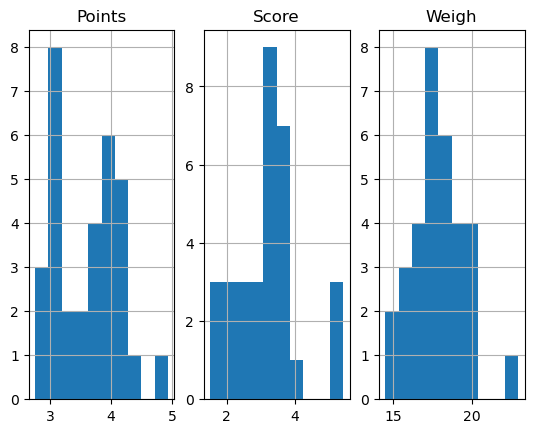

In [107]:
plt.subplot(131)
Q7_data.Points.hist()
plt.title("Points")
plt.subplot(132)
Q7_data.Score.hist()
plt.title("Score")
plt.subplot(133)
Q7_data.Weigh.hist()
plt.title("Weigh")
plt.savefig("Q7_data_hist.png")

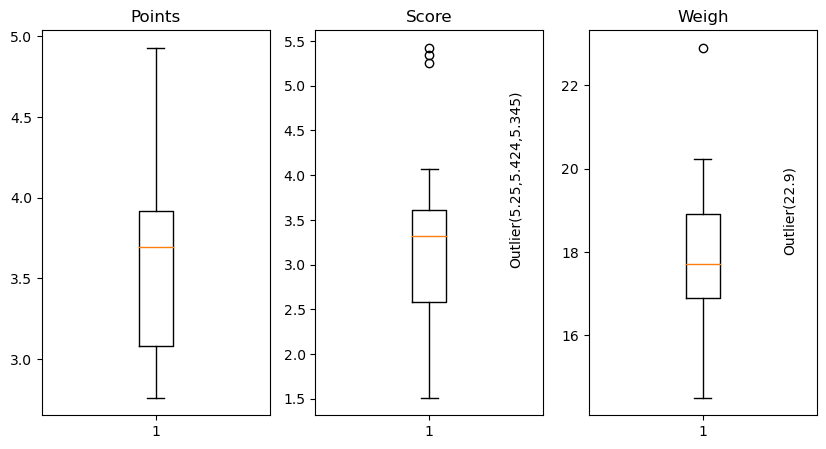

In [129]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.boxplot(Q7_data.Points)
plt.title("Points")
plt.subplot(132)
plt.boxplot(Q7_data.Score)
plt.text(1.35,3,"Outlier(5.25,5.424,5.345)",rotation="vertical")
plt.title("Score")
plt.subplot(133)
plt.boxplot(Q7_data.Weigh)
plt.title("Weigh")
plt.text(1.35,18,"Outlier(22.9)",rotation="vertical")
plt.savefig("Q7_data_boxplot.png")

[array([22.9])]

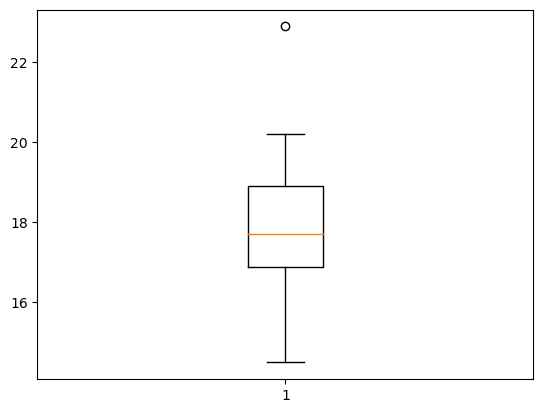

In [110]:
box = plt.boxplot(Q7_data.Weigh)
[item.get_ydata() for item in box["fliers"]]

In [115]:
#Q8
dict = {"weights" : [108, 110, 123, 134, 135, 145, 167, 187, 199]}
Q8_data = pd.DataFrame(dict)
Q8_data["probability"] = np.round(1/9,2)
Q8_data["Expectance"] = Q8_data.weights * Q8_data.probability
Q8_data.Expectance.sum()

143.88

In [139]:
#Q9
Q9a_data = pd.read_csv("Q9_a.csv",index_col="Index")
Q9b_data = pd.read_csv("Q9_b.csv",index_col=0)

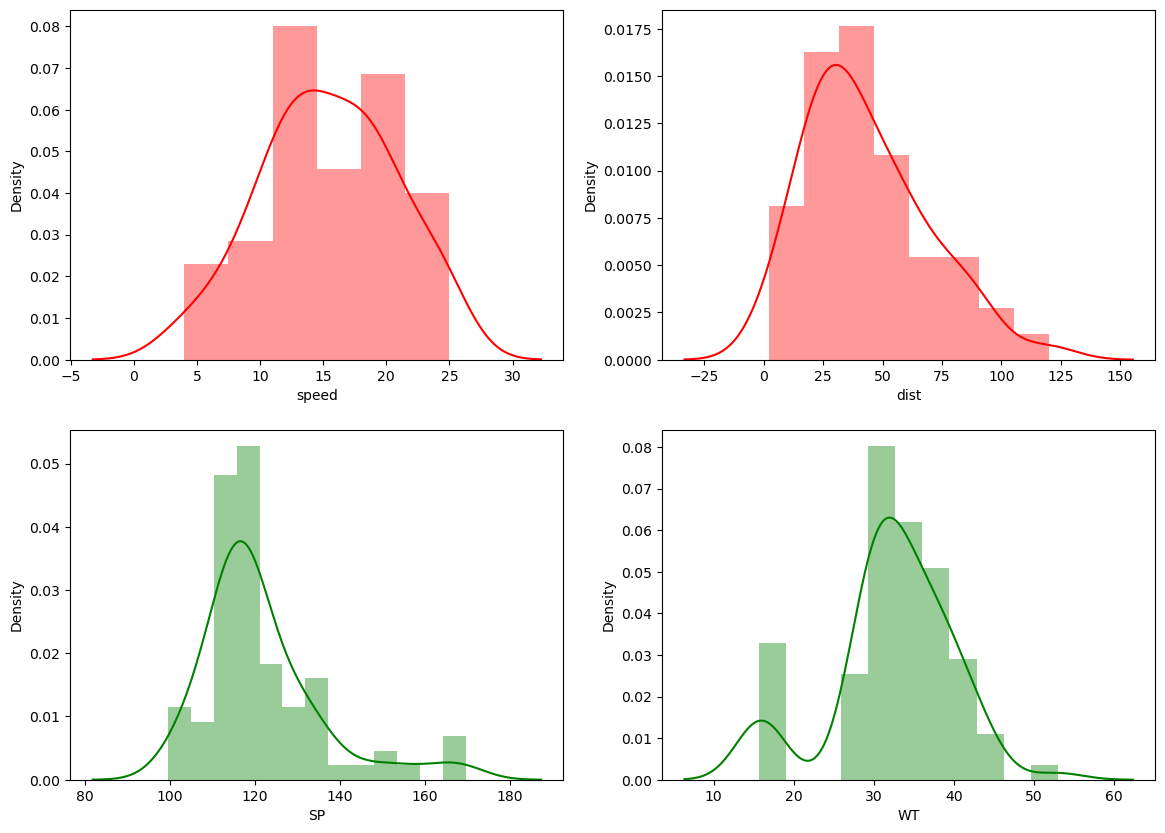

In [169]:
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.distplot(Q9a_data.speed,color="red")
plt.subplot(222)
sns.distplot(Q9a_data.dist,color="red")
plt.subplot(223)
sns.distplot(Q9b_data.SP,color="green")
plt.subplot(224)
sns.distplot(Q9b_data.WT,color="green")
plt.savefig("Q9_dist.png")

In [164]:
Q9b_data[["SP","WT"]].agg(["skew","kurt"])

,SP,WT
skew,1.611450,-0.614753
kurt,2.977329,0.950291


In [165]:
Q9a_data[["speed","dist"]].agg(["skew","kurt"])

,speed,dist
skew,-0.117510,0.806895
kurt,-0.508994,0.405053


In [191]:
#Q11

#Sample size ≥ 30 and population variance unknown: Use the normal distribution for the confidence interval for the population mean.
#Sample size < 30 and population variance unknown: Use the t-distribution for the confidence interval for the population mean.

for confidence_level in [0.94,0.96,0.98]:
    print(f"{math.floor(float(confidence_level)*100)}% confidence level",np.round(stats.norm.interval(confidence_level,loc=200,scale=30/(2000**0.5)),3))

94% confidence level [198.738 201.262]
96% confidence level [198.622 201.378]
98% confidence level [198.439 201.561]


In [193]:
#Q12
value = pd.Series([34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56])
value.agg(["mean","median","var","std"])

mean      41.000000
median    40.500000
var       25.529412
std        5.052664
dtype: float64

[array([49, 56], dtype=int64)]

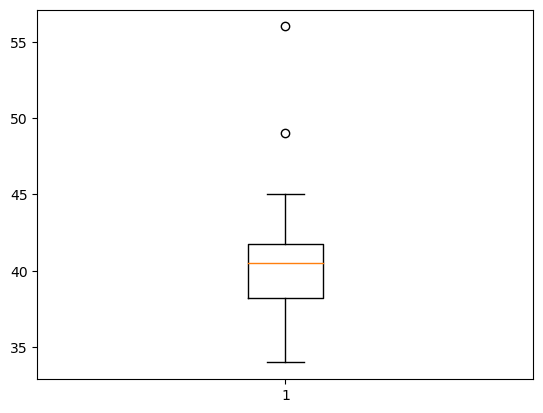

In [194]:
box = plt.boxplot(value)
[item.get_ydata() for item in box["fliers"]]

In [195]:
#20
cars = pd.read_csv("cars.csv")

In [196]:
cars.head(2)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833


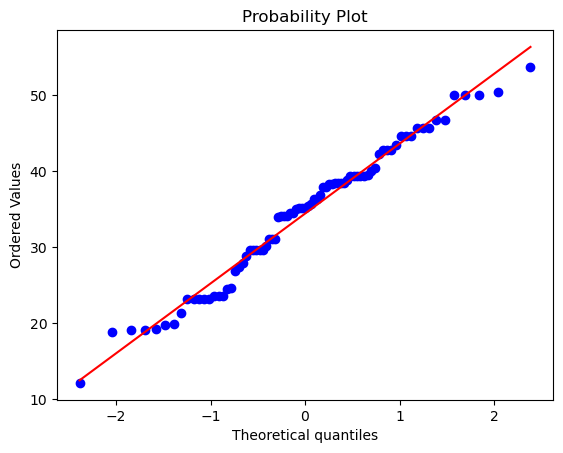

In [217]:
#QQ Plot (Quantile-Quantile Plot): Plot the quantiles of the data against the quantiles of a theoretical normal distribution.
# If the points fall approximately along a straight line, the data follows a normal distribution.
stats.probplot(cars.MPG,plot=plt)
plt.savefig("Cars_MPG.png")

In [206]:
stats.norm.sf(38,loc=cars.MPG.mean(),scale=cars.MPG.std())

0.34759392515827137

In [211]:
stats.norm.cdf(40,loc=cars.MPG.mean(),scale=cars.MPG.std())

0.7293498762151609

In [213]:
stats.norm.cdf(50,loc=cars.MPG.mean(),scale=cars.MPG.std()) - stats.norm.cdf(20,loc=cars.MPG.mean(),scale=cars.MPG.std())

0.8988689169682047

In [218]:
#20 b
wc_at = pd.read_csv("wc-at.csv")

In [220]:
wc_at.head(2)

,Waist,AT
0,74.75,25.72
1,72.60,25.89


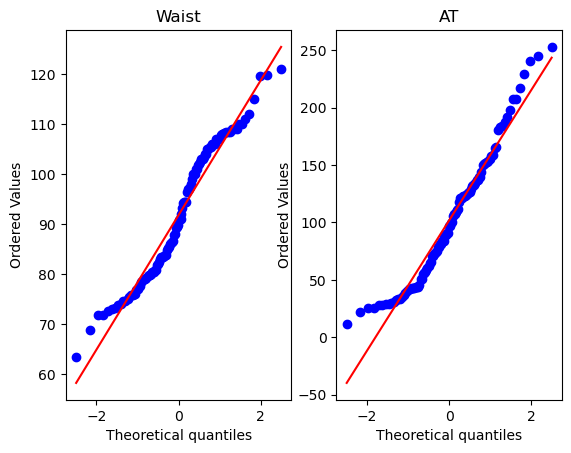

In [232]:
plt.subplot(121)
stats.probplot(wc_at.Waist,plot=plt)
plt.title("Waist")
plt.subplot(122)
stats.probplot(wc_at.AT,plot=plt)
plt.title("AT")
plt.savefig("wc_at.png")

In [234]:
# Shapiro-Wilk Test
p_value = stats.shapiro(wc_at.AT)
print("Shapiro-Wilk Test p-value:", p_value[1])
if p_value[1] > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

Shapiro-Wilk Test p-value: 0.0006539996829815209
The data does not follow a normal distribution.


In [233]:
p_value = stats.shapiro(wc_at.Waist)
print("Shapiro-Wilk Test p-value:", p_value[1])
if p_value[1] > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

Shapiro-Wilk Test p-value: 0.0011704873759299517
The data does not follow a normal distribution.


In [249]:
#22
#example 90% confidence interval = tail should be 0.05% 
#stats.norm.ppf(y) gives exact point (z-score) to which probablity lie to the left
np.round(stats.norm.ppf([0.05,0.03,0.2]),4)

array([-1.6449, -1.8808, -0.8416])

In [255]:
#23
# to find t scores for sample size 25
stats.t.ppf([0.975,0.98,0.995],24)

array([2.06389856, 2.17154468, 2.7969395 ])

In [257]:
#24
pop_mean = 270
sample_mean = 260

In [258]:
t_value = (sample_mean - pop_mean)/(90/(18**0.5))
t_value

-0.4714045207910317

In [261]:
stats.t.sf(abs(t_value),17)

0.32167253567098364

In [ ]:
0.32167253567098364